# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [249]:
%matplotlib inline
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [250]:
# Now connect plotly with our machine's python and pandas
init_notebook_mode(connected=True)
# Now we will run cufflink offline
cf.go_offline()

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df['title'].nunique()

110

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [11]:
# Visualize The Reason Column
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

In [13]:
import seaborn as sns

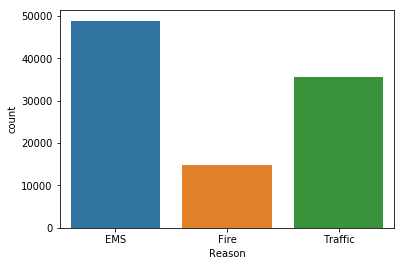

In [82]:
sns.countplot(x='Reason',data=df)

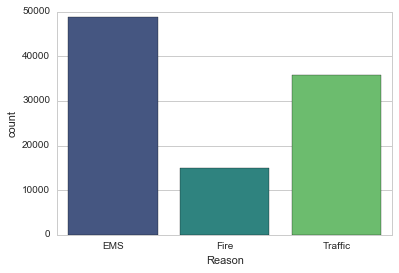

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [14]:
type(df['timeStamp'][0])

str

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [15]:
strTime = df['timeStamp']

In [16]:
df['timeStamp'] = pd.to_datetime(strTime)

In [17]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
time = df['timeStamp'][0]
type(time)

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
time

Timestamp('2015-12-10 17:40:00')

In [20]:
time.hour

17

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [21]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [22]:
df['Month'] = df['timeStamp'].apply(lambda x: x.month)

In [23]:
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [24]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month  Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12            3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12            3  
2                    HAWS AVE  1   Fire    17     12            3  
3          AIRY ST & SWEDE ST  1    EMS    17     12            3  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12            3

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [25]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [26]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [27]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12         Thu  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12         Thu  
2                    HAWS AVE  1   Fire    17     12         Thu  
3          AIRY ST & SWEDE ST  1    EMS    17     12         Thu  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12         Thu

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

In [28]:
import matplotlib.pyplot as plt

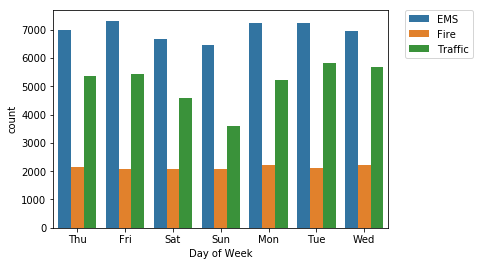

In [29]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

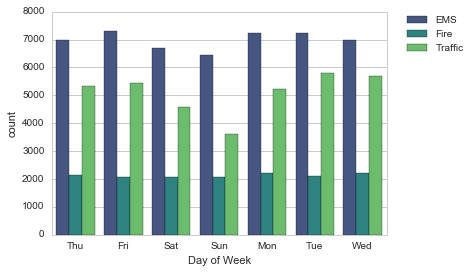

**Now do the same for Month:**

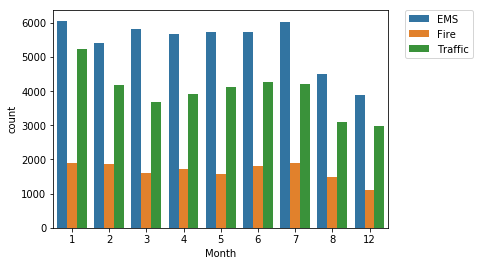

In [155]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

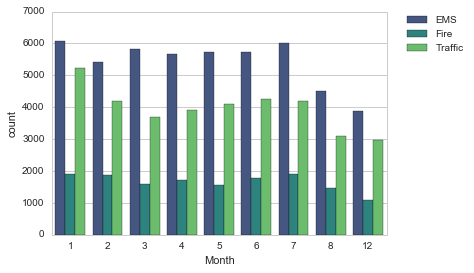

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [60]:
byMonth = df.groupby('Month')

In [61]:
byMonth.count()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   
6      11786  11786  11786  10212  11786      11786  11777  11732  11786   
7      12137  12137  12137  10633  12137      12137  12133  12088  12137   
8       9078   9078   9078   7832   9078       9078   9073   9025   9078   
12      7969   7969   7969   6907   7969       7969   7963   7916   7969   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423  
6       11786  11786        11786  
7       12137  12137        12137  
8        9078   9078         9078  
12       7969   7969         7969

In [43]:
byMonth.count()['lat']

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: lat, dtype: int64

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

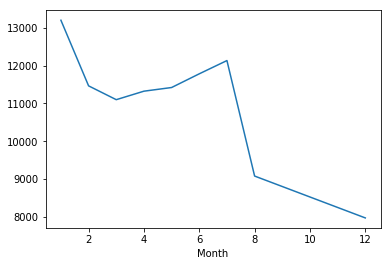

In [42]:
byMonth.count()['lat'].plot.line()

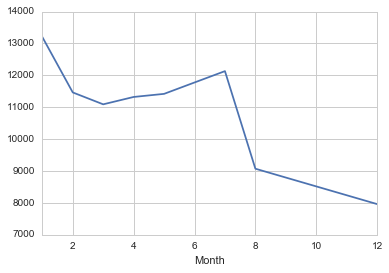

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

In [66]:
byMonth.count().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 12], dtype='int64', name='Month')

In [76]:
byMonth.count().columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'Hour', 'Day of Week'],
      dtype='object')

In [77]:
byMonth.count().reset_index(level=0, inplace=False)

Month    lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
0      1  13205  13205  13205  11527  13205      13205  13203  13096  13205   
1      2  11467  11467  11467   9930  11467      11467  11465  11396  11467   
2      3  11101  11101  11101   9755  11101      11101  11092  11059  11101   
3      4  11326  11326  11326   9895  11326      11326  11323  11283  11326   
4      5  11423  11423  11423   9946  11423      11423  11420  11378  11423   
5      6  11786  11786  11786  10212  11786      11786  11777  11732  11786   
6      7  12137  12137  12137  10633  12137      12137  12133  12088  12137   
7      8   9078   9078   9078   7832   9078       9078   9073   9025   9078   
8     12   7969   7969   7969   6907   7969       7969   7963   7916   7969   

   Reason   Hour  Day of Week  
0   13205  13205        13205  
1   11467  11467        11467  
2   11101  11101        11101  
3   11326  11326        11326  
4   11423  11423        11423  
5   11786  11786        11786  
6   12137  12137        12137  
7    9078   9078         9078  
8    7969   7969         7969

In [74]:
afterReset = byMonth.count().reset_index(level=0, inplace=False)

D:\InstalledSoftware\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



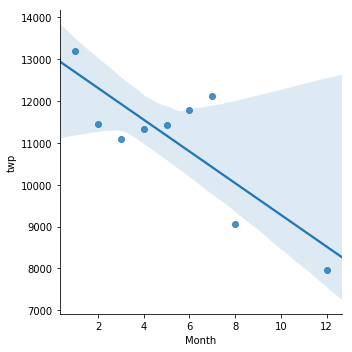

In [75]:
sns.lmplot(x='Month',y='twp',data=afterReset)

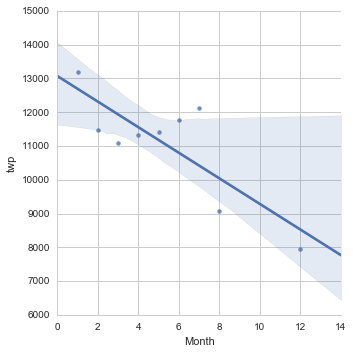

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [84]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [89]:
byDate = df.groupby('Date')

In [91]:
byDate.count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
Date                                                                        
2015-12-10  115  115   115  100    115        115  115   113  115     115   
2015-12-11  396  396   396  333    396        396  395   391  396     396   
2015-12-12  403  403   403  333    403        403  403   401  403     403   
2015-12-13  319  319   319  280    319        319  319   317  319     319   
2015-12-14  447  447   447  387    447        447  446   445  447     447   
2015-12-15  421  421   421  380    421        421  420   419  421     421   
2015-12-16  377  377   377  343    377        377  377   376  377     377   
2015-12-17  388  388   388  336    388        388  388   387  388     388   
2015-12-18  346  346   346  306    346        346  346   346  346     346   
2015-12-19  279  279   279  239    279        279  279   272  279     279   
2015-12-20  271  271   271  235    271        271  271   270  271     271   
2015-12-21  430  430   430  377    430        430  430   428  430     430   
2015-12-22  448  448   448  399    448        448  448   448  448     448   
2015-12-23  524  524   524  431    524        524  524   519  524     524   
2015-12-24  445  445   445  385    445        445  444   444  445     445   
2015-12-25  323  323   323  267    323        323  323   323  323     323   
2015-12-26  296  296   296  260    296        296  296   287  296     296   
2015-12-27  317  317   317  290    317        317  317   317  317     317   
2015-12-28  380  380   380  337    380        380  380   380  380     380   
2015-12-29  365  365   365  313    365        365  365   365  365     365   
2015-12-30  361  361   361  307    361        361  359   354  361     361   
2015-12-31  318  318   318  269    318        318  318   314  318     318   
2016-01-01  263  263   263  236    263        263  263   262  263     263   
2016-01-02  335  335   335  301    335        335  334   333  335     335   
2016-01-03  324  324   324  285    324        324  324   323  324     324   
2016-01-04  402  402   402  346    402        402  402   401  402     402   
2016-01-05  448  448   448  373    448        448  448   445  448     448   
2016-01-06  434  434   434  375    434        434  433   430  434     434   
2016-01-07  385  385   385  334    385        385  385   385  385     385   
2016-01-08  359  359   359  326    359        359  359   359  359     359   
...         ...  ...   ...  ...    ...        ...  ...   ...  ...     ...   
2016-07-26  446  446   446  390    446        446  446   440  446     446   
2016-07-27  421  421   421  369    421        421  421   421  421     421   
2016-07-28  443  443   443  386    443        443  443   441  443     443   
2016-07-29  431  431   431  379    431        431  431   430  431     431   
2016-07-30  353  353   353  303    353        353  353   351  353     353   
2016-07-31  381  381   381  309    381        381  381   377  381     381   
2016-08-01  384  384   384  329    384        384  384   384  384     384   
2016-08-02  404  404   404  365    404        404  404   404  404     404   
2016-08-03  403  403   403  344    403        403  403   403  403     403   
2016-08-04  422  422   422  365    422        422  420   419  422     422   
2016-08-05  422  422   422  366    422        422  422   419  422     422   
2016-08-06  378  378   378  331    378        378  378   372  378     378   
2016-08-07  332  332   332  290    332        332  332   332  332     332   
2016-08-08  378  378   378  334    378        378  378   375  378     378   
2016-08-09  350  350   350  299    350        350  350   347  350     350   
2016-08-10  345  345   345  293    345        345  345   342  345     345   
2016-08-11  449  449   449  368    449        449  449   449  449     449   
2016-08-12  441  441   441  377    441        441  441   441  441     441   
2016-08-13  393  393   393  346    393        393  393   388  393     393   
2016-08-

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

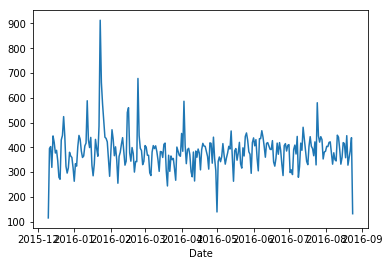

In [252]:
byDate.count()['twp'].plot()
plt.tight_layout

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

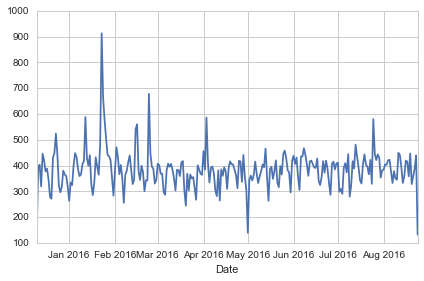

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [184]:
# Traffic Plot
byDate['Reason'].value_counts().head()

Date        Reason 
2015-12-10  EMS         57
            Traffic     43
            Fire        15
2015-12-11  EMS        186
            Traffic    141
Name: Reason, dtype: int64

In [190]:
isTraffic = byDate['Reason'].apply(lambda x: x == 'Traffic')

In [192]:
df[isTraffic].head()

lat        lng                                               desc  \
9   40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   
10  40.231990 -75.251891  RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...   
11  40.084161 -75.308386  BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...   
12  40.174131 -75.098491  BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...   
13  40.062974 -75.135914  OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...   

        zip                        title           timeStamp             twp  \
9   19462.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:40:01        PLYMOUTH   
10      NaN  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:40:01      MONTGOMERY   
11  19428.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:40:02        PLYMOUTH   
12  19040.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:40:02  UPPER MORELAND   
13  19027.0  Traffic: VEHICLE ACCIDENT - 2015-12-10 17:40:02      CHELTENHAM   

                                        addr  e   Reason  Hour  Month  \
9   BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD  1  Traffic    17     12   
10                     RT202 PKWY & KNAPP RD  1  Traffic    17     12   
11                     BROOK RD & COLWELL LN  1  Traffic    17     12   
12             BYBERRY AVE & S WARMINSTER RD  1  Traffic    17     12   
13                   OLD YORK RD & VALLEY RD  1  Traffic    17     12   

   Day of Week        Date  
9          Thu  2015-12-10  
10         Thu  2015-12-10  
11         Thu  2015-12-10  
12         Thu  2015-12-10  
13         Thu  2015-12-10

In [195]:
df[isTraffic].groupby('Date').count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
Date                                                                        
2015-12-10   43   43    43   35     43         43   43    41   43      43   
2015-12-11  141  141   141  108    141        141  141   137  141     141   
2015-12-12  146  146   146  109    146        146  146   144  146     146   
2015-12-13   78   78    78   54     78         78   78    76   78      78   
2015-12-14  186  186   186  150    186        186  186   184  186     186   

            Hour  Month  Day of Week  
Date                                  
2015-12-10    43     43           43  
2015-12-11   141    141          141  
2015-12-12   146    146          146  
2015-12-13    78     78           78  
2015-12-14   186    186          186

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

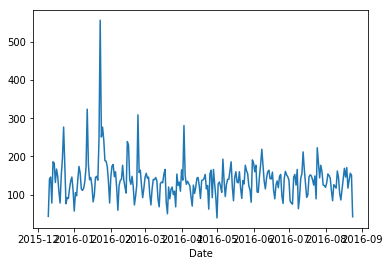

In [253]:
df[isTraffic].groupby('Date')['twp'].count().plot.line()
plt.tight_layout

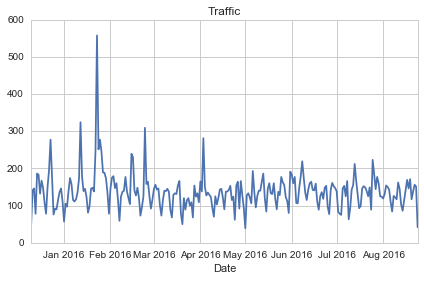

In [200]:
isFire = byDate['Reason'].apply(lambda x: x == 'Fire')

In [203]:
df[isFire].head()

lat        lng                                               desc  \
2   40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
22  40.199006 -75.300058  LILAC CT & PRIMROSE DR; UPPER GWYNEDD; 2015-12...   
27  40.028903 -75.351822  EDENTON PL & DURHAM DR; DELAWARE COUNTY; 2015-...   
41  40.104206 -75.367665  HAMPTON RD & BELMONT RD; UPPER MERION; 2015-12...   
47  40.224923 -75.528045  LINFIELD TRAPPE RD; LIMERICK; 2015-12-10 @ 18:...   

        zip                           title           timeStamp  \
2   19401.0             Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00   
22  19446.0            Fire: APPLIANCE FIRE 2015-12-10 18:02:01   
27  19085.0  Fire: CARBON MONOXIDE DETECTOR 2015-12-10 18:06:25   
41  19406.0             Fire: GAS-ODOR/LEAK 2015-12-10 18:37:01   
47  19468.0          Fire: VEHICLE ACCIDENT 2015-12-10 18:52:00   

                twp                     addr  e Reason  Hour  Month  \
2        NORRISTOWN                 HAWS AVE  1   Fire    17     12   
22    UPPER GWYNEDD   LILAC CT & PRIMROSE DR  1   Fire    18     12   
27  DELAWARE COUNTY   EDENTON PL & DURHAM DR  1   Fire    18     12   
41     UPPER MERION  HAMPTON RD & BELMONT RD  1   Fire    18     12   
47         LIMERICK       LINFIELD TRAPPE RD  1   Fire    18     12   

   Day of Week        Date  
2          Thu  2015-12-10  
22         Thu  2015-12-10  
27         Thu  2015-12-10  
41         Thu  2015-12-10  
47         Thu  2015-12-10

In [210]:
df[isFire].groupby('Date')['twp'].count().head()

Date
2015-12-10    15
2015-12-11    68
2015-12-12    68
2015-12-13    51
2015-12-14    38
Name: twp, dtype: int64

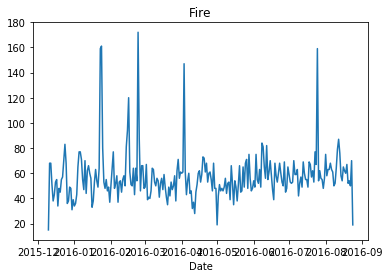

In [213]:
plt.title('Fire')
df[isFire].groupby('Date')['twp'].count().plot.line()

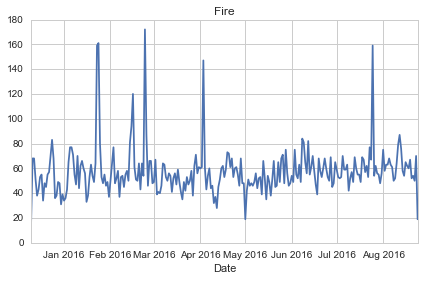

In [214]:
isEMS = byDate['Reason'].apply(lambda x: x == 'EMS')

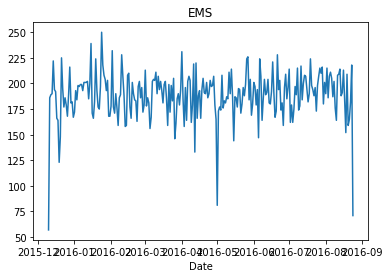

In [215]:
plt.title('EMS')
df[isEMS].groupby('Date')['twp'].count().plot.line()

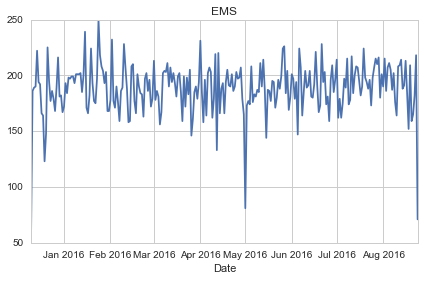

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [255]:
byDayOfWeekAndHour = df.groupby(['Day of Week','Hour'])

In [262]:
byDayOfWeekAndHour.count().head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201

In [265]:
Matrix = byDayOfWeekAndHour['lat'].count().unstack(level=-1)

In [266]:
Matrix

Hour          0    1    2    3    4    5    6    7    8    9  ...    14   15  \
Day of Week                                                   ...              
Fri          275  235  191  175  201  194  372  598  742  752 ...   932  980   
Mon          282  221  201  194  204  267  397  653  819  786 ...   869  913   
Sat          375  301  263  260  224  231  257  391  459  640 ...   789  796   
Sun          383  306  286  268  242  240  300  402  483  620 ...   684  691   
Thu          278  202  233  159  182  203  362  570  777  828 ...   876  969   
Tue          269  240  186  170  209  239  415  655  889  880 ...   943  938   
Wed          250  216  189  209  156  255  410  701  875  808 ...   904  867   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  
Tue          1026  1019  905  731  647  571  462  274  
Wed           990  1037  894  686  668  575  490  335  

[7 rows x 24 columns]

Hour          0    1    2    3    4    5    6    7    8    9  ...    14   15  \
Day of Week                                                   ...              
Fri          275  235  191  175  201  194  372  598  742  752 ...   932  980   
Mon          282  221  201  194  204  267  397  653  819  786 ...   869  913   
Sat          375  301  263  260  224  231  257  391  459  640 ...   789  796   
Sun          383  306  286  268  242  240  300  402  483  620 ...   684  691   
Thu          278  202  233  159  182  203  362  570  777  828 ...   876  969   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  

[5 rows x 24 columns]

**Now create a HeatMap using this new DataFrame.**

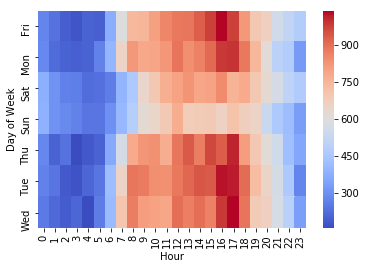

In [270]:
sns.heatmap(data=Matrix,cmap='coolwarm')

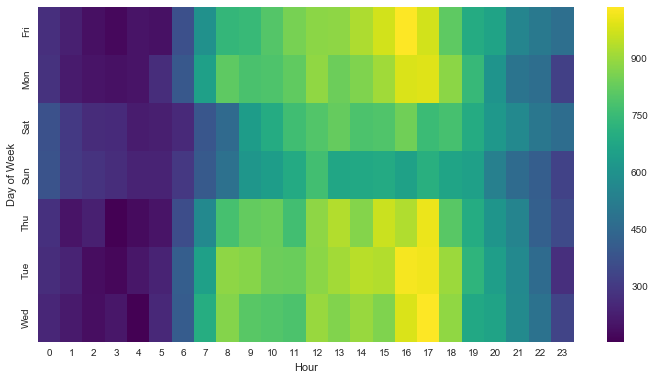

**Now create a clustermap using this DataFrame.**

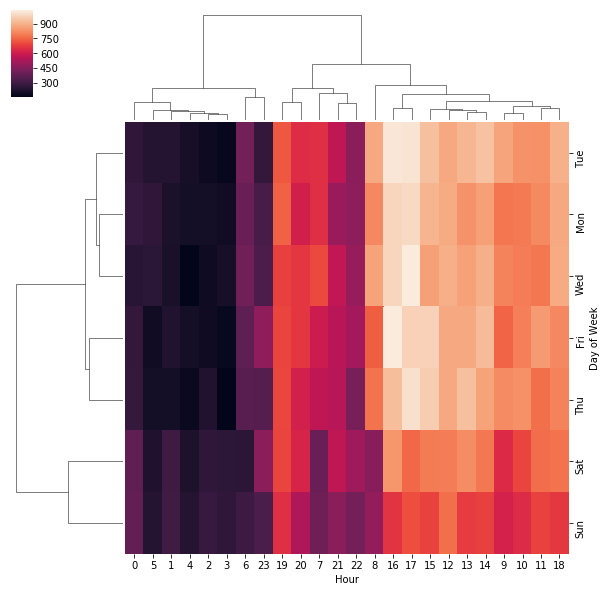

In [274]:
sns.clustermap(Matrix)

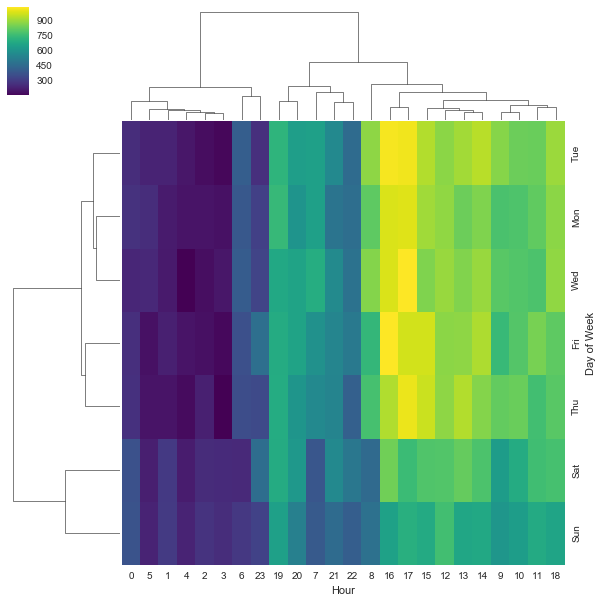

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [280]:
goupByDayOfWeekAndMonth = df.groupby(['Day of Week','Month'])

In [282]:
goupByDayOfWeekAndMonth.count().head()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Month                                                               
Fri         1      1970  1970  1970  1736   1970       1970  1970  1955  1970   
            2      1581  1581  1581  1362   1581       1581  1581  1566  1581   
            3      1525  1525  1525  1332   1525       1525  1523  1519  1525   
            4      1958  1958  1958  1684   1958       1958  1958  1948  1958   
            5      1730  1730  1730  1504   1730       1730  1730  1720  1730   

                   Reason  Hour  Date  
Day of Week Month                      
Fri         1        1970  1970  1970  
            2        1581  1581  1581  
            3        1525  1525  1525  
            4        1958  1958  1958  
            5        1730  1730  1730

In [285]:
secondMatrix = goupByDayOfWeekAndMonth['lat'].count().unstack(level=-1)

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Fri          1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon          1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat          2291  1441  1266  1734  1444  1388  1695  1099   978
Sun          1960  1229  1102  1488  1424  1333  1672  1021   907
Thu          1584  1596  1900  1601  1590  2065  1646  1230  1266

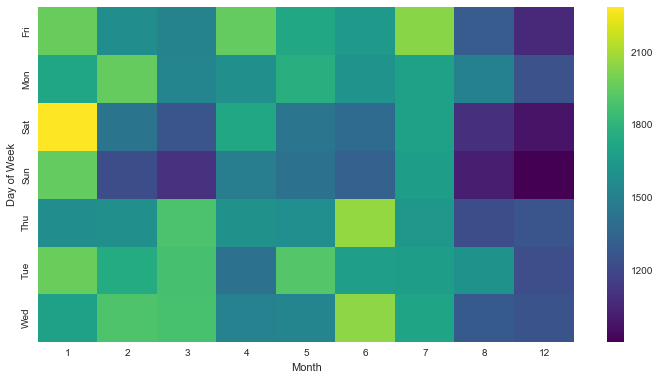

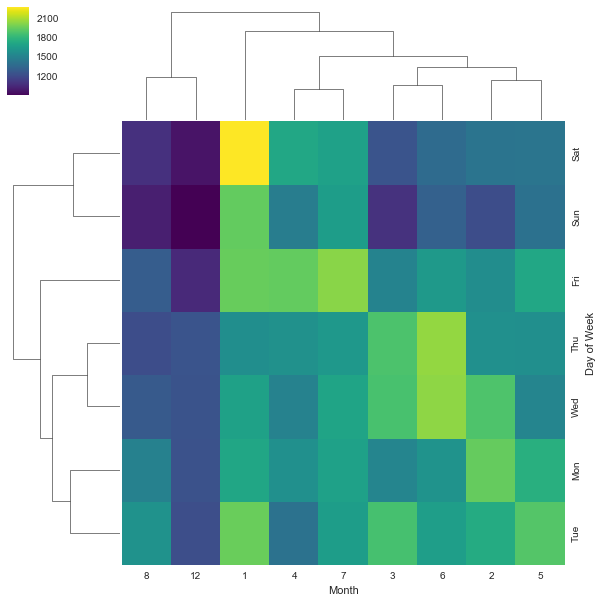

**Continue exploring the Data however you see fit!**
# Great Job!